### Import Libraries

**This notebook inspired by LASAL JAYAWARDENA and I use it for researching only!!**

**Thanks for sharing!**


1. import data
2. clear data: 
 * conver data in Price column
 * seperate Location to City and District
3. EDA
 * check stats of dataframe
 *  Checking the null values 
 * creaete heatmap
4. Data viz
    * Most popular Mobile Brand
    * Most popular Mobile Model.
    * Top 10 Cities by Number of phones stold
    * Top 10 Districts by Number of Mobile phones stold
    * Distibution of seller types
    * Top 10 Sellers by Number of Mobile phones stold
    * Top 10 Sellers by Total Revenue of phones stold
    * Visualize most popular features in phones
    * Create and generate a word cloud image
    * Display the generated image




In [2]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%config Completer.use_jedi = False

### Load the Data

In [3]:
df = pd.read_csv('mobile_prices.csv')

In [4]:
df.head()


,Title,Sub_title,Price,Brand,Condition,Edition,Model,Features,Location,Description,Post_URL,Seller_name,Seller_type,published_date
0,Apple iPhone 11 128GB (Used) for sale,"Posted on 09 Oct 1:05 pm, Moratuwa, Colombo","Rs 137,990",Apple,Used,128GB,iPhone 11,NaN,"Moratuwa, Colombo",à¶à¶¶à¶§ à·à·à¶¯ à¶­à¶­à·à·à¶ºà· à¶ à¶½à...,https://ikman.lk/en/ad/apple-iphone-11-128gb-u...,T.Phone Zone,Premium-Member,2021-10-09 13:05:00
1,Infinix Hot 10 Play (New) for sale,"Posted on 23 Oct 8:34 pm, Alutgama, Kalutara","Rs 28,500",Infinix,New,Hot 10 Play,Other model,"Bluetooth, Camera, Dual-Lens Camera, Dual SIM,...","Alutgama, Kalutara",INFINIX HOT 10 PLAY4 GB RAM / 64GB ROM ââ...,https://ikman.lk/en/ad/infinix-hot-10-play-new...,EMAX Sri Lanka,Member,2021-10-23 20:34:00
2,Apple iPhone 7 USA < USA> (Used) for sale,"Posted on 24 Oct 10:24 am, Angoda, Colombo","Rs 35,000",Apple,Used,USA < USA>,iPhone 7,NaN,"Angoda, Colombo",ððIMPORTED NOT USED IN SRI LANKAðð...,https://ikman.lk/en/ad/apple-iphone-7-usa-usa-...,Smart Hub,Premium-Member,2021-10-24 10:24:00
3,Huawei Y3 (Used) for sale,"Posted on 24 Oct 10:23 am, Negombo, Gampaha","Rs 7,000",Huawei,Used,NaN,Y3,"Bluetooth, Camera, Dual SIM, Expandable Memory...","Negombo, Gampaha",glass crack price can change call for more det...,https://ikman.lk/en/ad/huawei-y3-used-for-sale...,philip roshan,Member,2021-10-24 10:23:00
4,Xiaomi Redmi 9 (Used) for sale,"Posted on 24 Oct 10:22 am, Kottawa, Colombo","Rs 19,000",Xiaomi,Used,Xiaomi,Redmi 9,"Bluetooth, Camera, Dual-Lens Camera, Dual SIM,...","Kottawa, Colombo",full set 4th cam glass crack all cams working ...,https://ikman.lk/en/ad/xiaomi-redmi-9-good-use...,maxa king,Member,2021-10-24 10:22:00


### Data Cleaning

In [5]:
#clean the data in price column: covert to number
# Return nan for prices which are listed as negotiable

def extract_num(row):
    try:
        amount = row.split(' ')[-1] 
        return int(re.sub(r'[.,]', '', amount))
    except:
        np.nan

    

In [6]:
df['Price']= df['Price'].apply(extract_num)

In [7]:
df['Price']

0        137990
1         28500
2         35000
3          7000
4         19000
          ...  
10222     28999
10223     25000
10224     38000
10225     29550
10226     39500
Name: Price, Length: 10227, dtype: int64

In [8]:
#create city and district column
df['City']= df['Location'].apply(lambda x: x.split(',')[0])
df['District']= df['Location'].apply(lambda x: x.split(',')[1])
df.head()

,Title,Sub_title,Price,Brand,Condition,Edition,Model,Features,Location,Description,Post_URL,Seller_name,Seller_type,published_date,City,District
0,Apple iPhone 11 128GB (Used) for sale,"Posted on 09 Oct 1:05 pm, Moratuwa, Colombo",137990,Apple,Used,128GB,iPhone 11,NaN,"Moratuwa, Colombo",à¶à¶¶à¶§ à·à·à¶¯ à¶­à¶­à·à·à¶ºà· à¶ à¶½à...,https://ikman.lk/en/ad/apple-iphone-11-128gb-u...,T.Phone Zone,Premium-Member,2021-10-09 13:05:00,Moratuwa,Colombo
1,Infinix Hot 10 Play (New) for sale,"Posted on 23 Oct 8:34 pm, Alutgama, Kalutara",28500,Infinix,New,Hot 10 Play,Other model,"Bluetooth, Camera, Dual-Lens Camera, Dual SIM,...","Alutgama, Kalutara",INFINIX HOT 10 PLAY4 GB RAM / 64GB ROM ââ...,https://ikman.lk/en/ad/infinix-hot-10-play-new...,EMAX Sri Lanka,Member,2021-10-23 20:34:00,Alutgama,Kalutara
2,Apple iPhone 7 USA < USA> (Used) for sale,"Posted on 24 Oct 10:24 am, Angoda, Colombo",35000,Apple,Used,USA < USA>,iPhone 7,NaN,"Angoda, Colombo",ððIMPORTED NOT USED IN SRI LANKAðð...,https://ikman.lk/en/ad/apple-iphone-7-usa-usa-...,Smart Hub,Premium-Member,2021-10-24 10:24:00,Angoda,Colombo
3,Huawei Y3 (Used) for sale,"Posted on 24 Oct 10:23 am, Negombo, Gampaha",7000,Huawei,Used,NaN,Y3,"Bluetooth, Camera, Dual SIM, Expandable Memory...","Negombo, Gampaha",glass crack price can change call for more det...,https://ikman.lk/en/ad/huawei-y3-used-for-sale...,philip roshan,Member,2021-10-24 10:23:00,Negombo,Gampaha
4,Xiaomi Redmi 9 (Used) for sale,"Posted on 24 Oct 10:22 am, Kottawa, Colombo",19000,Xiaomi,Used,Xiaomi,Redmi 9,"Bluetooth, Camera, Dual-Lens Camera, Dual SIM,...","Kottawa, Colombo",full set 4th cam glass crack all cams working ...,https://ikman.lk/en/ad/xiaomi-redmi-9-good-use...,maxa king,Member,2021-10-24 10:22:00,Kottawa,Colombo


In [9]:
df = df.drop('Location', axis=1)

### EDA

In [10]:
print(df.describe())

               Price
count   10227.000000
mean    56704.923047
std     65249.312301
min       500.000000
25%     21000.000000
50%     33990.000000
75%     60000.000000
max    475000.000000


In [11]:
print(df.drop("Price", axis=1).describe())

                                       Title  \
count                                  10227   
unique                                  4655   
top     Apple iPhone 7 128GB (Used) for sale   
freq                                     209   

                                            Sub_title  Brand Condition  \
count                                           10227  10227     10227   
unique                                           9389     32         2   
top     Posted on 23 Oct 11:24 am, Colombo 3, Colombo  Apple      Used   
freq                                               50   4077      8332   

       Edition     Model                                           Features  \
count     8639     10227                                               7472   
unique    3069       462                                                975   
top      128GB  iPhone 7  Bluetooth, Camera, Dual-Lens Camera, Dual SIM,...   
freq       745       773                                               1

In [12]:
df.isnull().sum()

Title                0
Sub_title            0
Price                0
Brand                0
Condition            0
Edition           1588
Model                0
Features          2755
Description          0
Post_URL             0
Seller_name          0
Seller_type          0
published_date       0
City                 0
District             0
dtype: int64

### Data Viz

<AxesSubplot:>

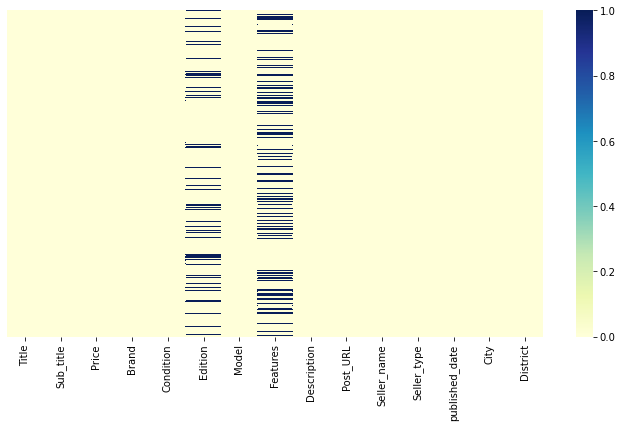

In [13]:
#heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(),cmap="YlGnBu", yticklabels = False)

In [14]:
df.head()

,Title,Sub_title,Price,Brand,Condition,Edition,Model,Features,Description,Post_URL,Seller_name,Seller_type,published_date,City,District
0,Apple iPhone 11 128GB (Used) for sale,"Posted on 09 Oct 1:05 pm, Moratuwa, Colombo",137990,Apple,Used,128GB,iPhone 11,NaN,à¶à¶¶à¶§ à·à·à¶¯ à¶­à¶­à·à·à¶ºà· à¶ à¶½à...,https://ikman.lk/en/ad/apple-iphone-11-128gb-u...,T.Phone Zone,Premium-Member,2021-10-09 13:05:00,Moratuwa,Colombo
1,Infinix Hot 10 Play (New) for sale,"Posted on 23 Oct 8:34 pm, Alutgama, Kalutara",28500,Infinix,New,Hot 10 Play,Other model,"Bluetooth, Camera, Dual-Lens Camera, Dual SIM,...",INFINIX HOT 10 PLAY4 GB RAM / 64GB ROM ââ...,https://ikman.lk/en/ad/infinix-hot-10-play-new...,EMAX Sri Lanka,Member,2021-10-23 20:34:00,Alutgama,Kalutara
2,Apple iPhone 7 USA < USA> (Used) for sale,"Posted on 24 Oct 10:24 am, Angoda, Colombo",35000,Apple,Used,USA < USA>,iPhone 7,NaN,ððIMPORTED NOT USED IN SRI LANKAðð...,https://ikman.lk/en/ad/apple-iphone-7-usa-usa-...,Smart Hub,Premium-Member,2021-10-24 10:24:00,Angoda,Colombo
3,Huawei Y3 (Used) for sale,"Posted on 24 Oct 10:23 am, Negombo, Gampaha",7000,Huawei,Used,NaN,Y3,"Bluetooth, Camera, Dual SIM, Expandable Memory...",glass crack price can change call for more det...,https://ikman.lk/en/ad/huawei-y3-used-for-sale...,philip roshan,Member,2021-10-24 10:23:00,Negombo,Gampaha
4,Xiaomi Redmi 9 (Used) for sale,"Posted on 24 Oct 10:22 am, Kottawa, Colombo",19000,Xiaomi,Used,Xiaomi,Redmi 9,"Bluetooth, Camera, Dual-Lens Camera, Dual SIM,...",full set 4th cam glass crack all cams working ...,https://ikman.lk/en/ad/xiaomi-redmi-9-good-use...,maxa king,Member,2021-10-24 10:22:00,Kottawa,Colombo


In [15]:
top_10_brand = df[["published_date", "Brand"]].groupby("Brand").agg(['count'])['published_date']['count'].sort_values(ascending=False)[:10]

top_10_brand

Brand
Apple      4077
Samsung    2620
Xiaomi      791
Huawei      720
Sony        526
Nokia       312
Oppo        299
Vivo        208
LG          137
OnePlus     124
Name: count, dtype: int64

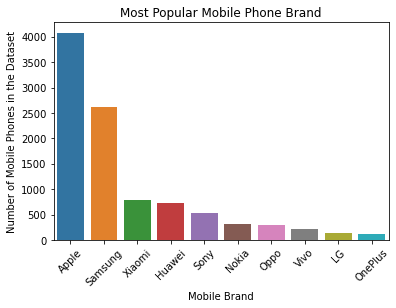

In [16]:
# Top 10 Cities by Number of phones stold
fig = sns.barplot( x = top_10_brand.index, y = top_10_brand.values)
fig.set_xticklabels(labels=top_10_brand.index , rotation=45)
fig.set_ylabel("Number of Mobile Phones in the Dataset")
fig.set_xlabel("Mobile Brand")
fig.set_title("Most Popular Mobile Phone Brand");

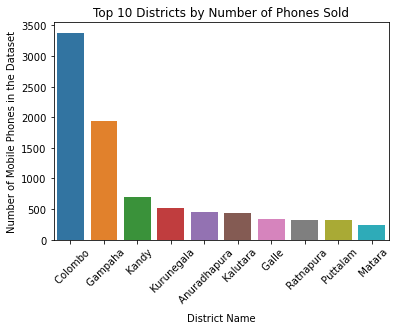

In [17]:
# Top 10 Districts by Number of Mobile phones sold

top_10_dist = df[["published_date", "District"]].groupby("District").agg(['count'])["published_date"]['count'].sort_values(ascending=False)[:10]
fig = sns.barplot( x = top_10_dist.index, y = top_10_dist.values)
fig.set_xticklabels(labels=top_10_dist.index , rotation=45)
fig.set_ylabel("Number of Mobile Phones in the Dataset")
fig.set_xlabel("District Name")
fig.set_title("Top 10 Districts by Number of Phones Sold");

Text(0.5, 1.0, 'seller type distribution')

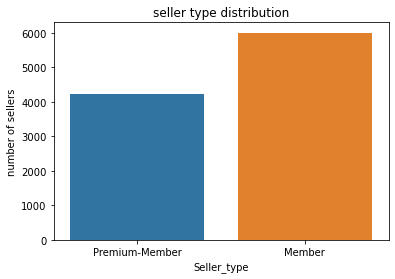

In [18]:
# Distibution of seller types
fig = sns.countplot(data=df,x='Seller_type')
fig.set_ylabel('number of sellers')
fig.set_title('seller type distribution')

In [19]:
df.head()

,Title,Sub_title,Price,Brand,Condition,Edition,Model,Features,Description,Post_URL,Seller_name,Seller_type,published_date,City,District
0,Apple iPhone 11 128GB (Used) for sale,"Posted on 09 Oct 1:05 pm, Moratuwa, Colombo",137990,Apple,Used,128GB,iPhone 11,NaN,à¶à¶¶à¶§ à·à·à¶¯ à¶­à¶­à·à·à¶ºà· à¶ à¶½à...,https://ikman.lk/en/ad/apple-iphone-11-128gb-u...,T.Phone Zone,Premium-Member,2021-10-09 13:05:00,Moratuwa,Colombo
1,Infinix Hot 10 Play (New) for sale,"Posted on 23 Oct 8:34 pm, Alutgama, Kalutara",28500,Infinix,New,Hot 10 Play,Other model,"Bluetooth, Camera, Dual-Lens Camera, Dual SIM,...",INFINIX HOT 10 PLAY4 GB RAM / 64GB ROM ââ...,https://ikman.lk/en/ad/infinix-hot-10-play-new...,EMAX Sri Lanka,Member,2021-10-23 20:34:00,Alutgama,Kalutara
2,Apple iPhone 7 USA < USA> (Used) for sale,"Posted on 24 Oct 10:24 am, Angoda, Colombo",35000,Apple,Used,USA < USA>,iPhone 7,NaN,ððIMPORTED NOT USED IN SRI LANKAðð...,https://ikman.lk/en/ad/apple-iphone-7-usa-usa-...,Smart Hub,Premium-Member,2021-10-24 10:24:00,Angoda,Colombo
3,Huawei Y3 (Used) for sale,"Posted on 24 Oct 10:23 am, Negombo, Gampaha",7000,Huawei,Used,NaN,Y3,"Bluetooth, Camera, Dual SIM, Expandable Memory...",glass crack price can change call for more det...,https://ikman.lk/en/ad/huawei-y3-used-for-sale...,philip roshan,Member,2021-10-24 10:23:00,Negombo,Gampaha
4,Xiaomi Redmi 9 (Used) for sale,"Posted on 24 Oct 10:22 am, Kottawa, Colombo",19000,Xiaomi,Used,Xiaomi,Redmi 9,"Bluetooth, Camera, Dual-Lens Camera, Dual SIM,...",full set 4th cam glass crack all cams working ...,https://ikman.lk/en/ad/xiaomi-redmi-9-good-use...,maxa king,Member,2021-10-24 10:22:00,Kottawa,Colombo


In [20]:
# Top 10 Sellers by Number of Mobile phones sold
top_10_sell = df[['published_date','Seller_name']].groupby('Seller_name').agg(['count'])['published_date']['count'].sort_values(ascending= False)[:10]

[Text(0, 0, 'Mobi Heart'),
 Text(1, 0, 'Usedphones.lk'),
 Text(2, 0, 'Shan Mobile'),
 Text(3, 0, 'Style Mobile'),
 Text(4, 0, 'Next Mobile'),
 Text(5, 0, 'Air Apple'),
 Text(6, 0, 'iTop.lk'),
 Text(7, 0, 'Dream Mobile'),
 Text(8, 0, 'International Mobiles'),
 Text(9, 0, 'TN Mobile')]

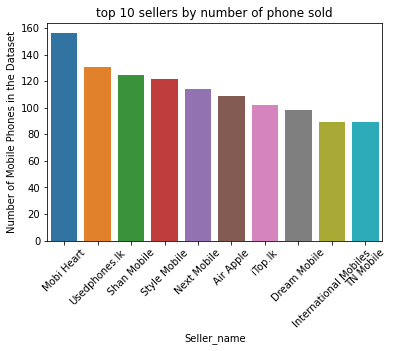

In [21]:
fig= sns.barplot(x=top_10_sell.index, y = top_10_sell.values)
fig.set_title('top 10 sellers by number of phone sold')
fig.set_ylabel("Number of Mobile Phones in the Dataset")
fig.set_xticklabels(labels=top_10_sell.index, rotation= 45)

[Text(0, 0, 'Air Apple'),
 Text(1, 0, 'eWorld.lk - by French Mobile'),
 Text(2, 0, 'Dream Mobile'),
 Text(3, 0, 'Usedphones.lk'),
 Text(4, 0, 'Tech Life'),
 Text(5, 0, 'LEADING STORE'),
 Text(6, 0, 'Shan Mobile'),
 Text(7, 0, 'Next Mobile'),
 Text(8, 0, 'Mobi Heart'),
 Text(9, 0, 'iTop.lk')]

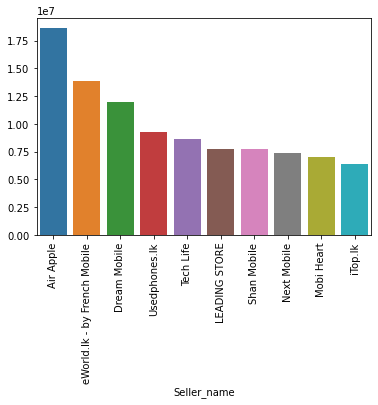

In [22]:
# Top 10 Sellers by Total Revenue of phones sold
top_10_sell = df[['Price', 'Seller_name']].groupby('Seller_name').agg(['sum'])['Price']['sum'].sort_values(ascending=False)[:10]
fig= sns.barplot(x= top_10_sell.index, y=top_10_sell.values)
fig.set_xticklabels(labels=top_10_sell.index, rotation=90)

In [23]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

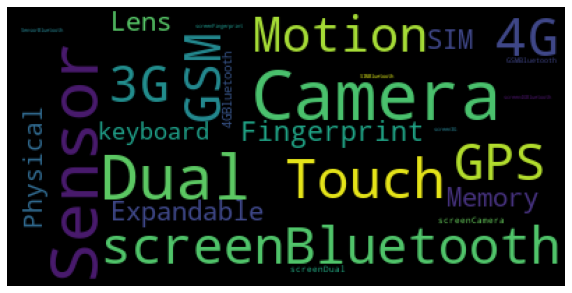

In [24]:
# Visualize most popular features in phones
phone_features = ""
for idx, row in df.iterrows():
    if isinstance(row.Features, str):
        phone_features += " ".join(row.Features.split(", "))
        

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color='black',max_font_size = 50, collocations=False).generate(phone_features)


# Display the generated image:
plt.figure( figsize=(10,6) )
plt.imshow(wordcloud)
plt.axis("off")
plt.show()